In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def creaDataFrame_normal(n):
    
    consecutivos = range(n)
    aleatorios = [np.random.normal() for x in range(n)]
#     aleatorios = [np.nan if random.random()>0.95 else x for x in aleatorios ]

    data = pd.DataFrame({
        "consecutivos" : consecutivos,
        "aleatorios"   : aleatorios
    })
    
    return data


In [6]:
datos = creaDataFrame_normal(10000)

<AxesSubplot:ylabel='Frequency'>

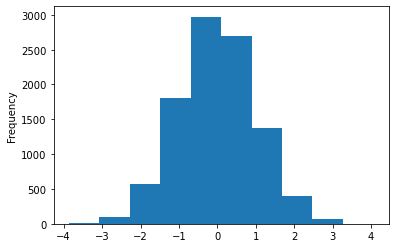

In [9]:
datos["aleatorios"].plot.hist()

In [10]:
def histograma(serie):
    
    print(serie.describe())
    
    mediana = serie.median()
    media   = serie.mean()
    
    valor_maximo = max(np.histogram(serie, bins=100)[0])
    
    serie.plot.hist(bins=100, alpha=0.5)
    plt.vlines(mediana, 0, valor_maximo, colors="g")
    plt.vlines(media, 0, valor_maximo, colors="r")
    plt.show()

count    10000.000000
mean        -0.013430
std          1.005746
min         -3.865175
25%         -0.691322
50%         -0.021847
75%          0.659100
max          4.056597
Name: aleatorios, dtype: float64


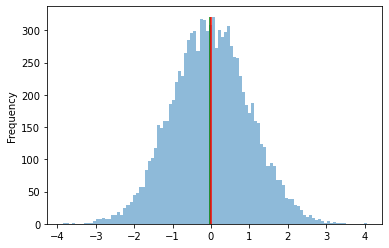

In [11]:
histograma(datos["aleatorios"])

In [39]:
datos["aleatorios"] = [random.randrange(10,15) if random.random()>0.95 else x for x in datos["aleatorios"]]

count    10000.000000
mean         0.593360
std          2.832477
min         -3.865175
25%         -0.652500
50%          0.043768
75%          0.790341
max         14.000000
Name: aleatorios, dtype: float64


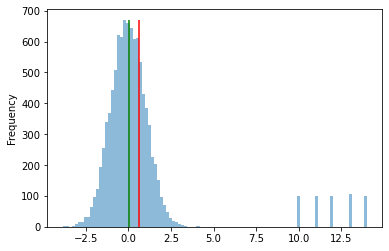

In [40]:
histograma(datos["aleatorios"])

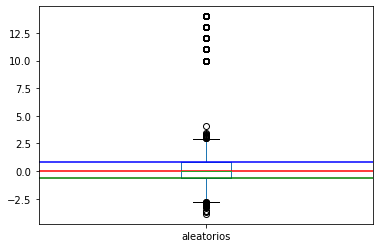

In [43]:
datos["aleatorios"].plot.box()

plt.axhline(y= np.percentile(datos["aleatorios"], 25), c="g")

plt.axhline(y= np.percentile(datos["aleatorios"], 50), c="r")

plt.axhline(y= np.percentile(datos["aleatorios"], 75), c="b")

In [44]:
iqr = np.percentile(datos["aleatorios"], 75) - np.percentile(datos["aleatorios"], 25)

In [46]:
limite_inferior = np.percentile(datos["aleatorios"], 25) - iqr *1.5
limite_superior = np.percentile(datos["aleatorios"], 75) + iqr *1.5

In [60]:
limite_inferior

-2.8167620969240392

In [61]:
limite_superior

2.9546035435902898

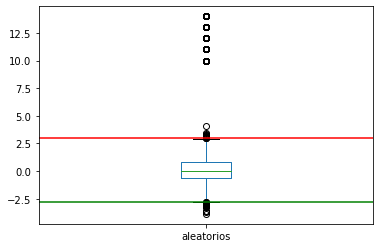

In [49]:
datos["aleatorios"].plot.box()
plt.axhline(y= limite_inferior, c="g")
plt.axhline(y= limite_superior, c="r")

In [50]:
from scipy import stats
stats.iqr(datos["aleatorios"])

1.4428414101285822

In [52]:
filtro = (datos["aleatorios"]>limite_superior) | (datos["aleatorios"]<limite_inferior)

In [54]:
datos_atipicos = datos[filtro]

In [55]:
datos_atipicos

,consecutivos,aleatorios
1,1,14.000000
12,12,10.000000
16,16,12.000000
53,53,11.000000
76,76,12.000000
...,...,...
9906,9906,11.000000
9925,9925,14.000000
9941,9941,3.106955
9968,9968,12.000000


In [56]:
datos_limpios = datos[~filtro]

count    9447.000000
mean       -0.011384
std         0.985622
min        -2.799492
25%        -0.685207
50%        -0.021868
75%         0.659048
max         2.937362
Name: aleatorios, dtype: float64


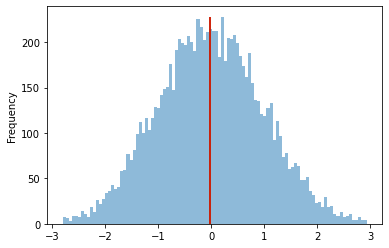

In [58]:
histograma(datos_limpios["aleatorios"])

<AxesSubplot:>

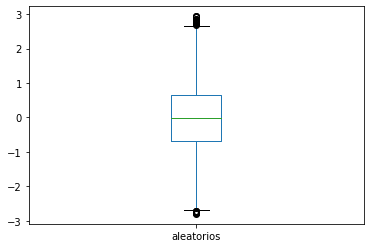

In [59]:
datos_limpios["aleatorios"].plot.box()

# Z-Score

count    10000.000000
mean         0.593360
std          2.832477
min         -3.865175
25%         -0.652500
50%          0.043768
75%          0.790341
max         14.000000
Name: aleatorios, dtype: float64


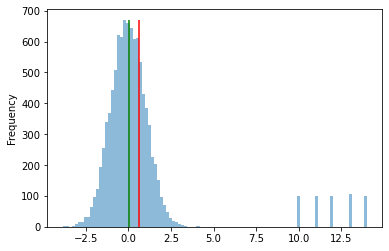

In [62]:
histograma(datos["aleatorios"])

In [64]:
datos["aleatorios"].head()

0    -0.360810
1    14.000000
2    -2.089441
3     0.050787
4     1.368783
Name: aleatorios, dtype: float64

In [72]:
datos_z = stats.zscore(datos["aleatorios"])

In [77]:
filtro = (datos_z>3) | (datos_z<-3)

In [78]:
datos_atipicos = datos[filtro]

In [79]:
datos_atipicos

,consecutivos,aleatorios
1,1,14.0
12,12,10.0
16,16,12.0
53,53,11.0
76,76,12.0
...,...,...
9876,9876,11.0
9906,9906,11.0
9925,9925,14.0
9968,9968,12.0


In [80]:
datos_limpios = datos[~filtro]

count    9493.000000
mean       -0.016265
std         1.007007
min        -3.865175
25%        -0.691315
50%        -0.024321
75%         0.660502
max         4.056597
Name: aleatorios, dtype: float64


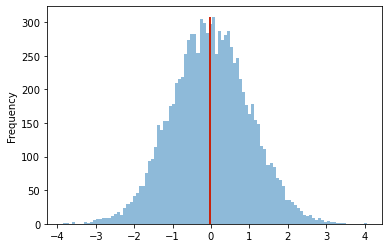

In [81]:
histograma(datos_limpios["aleatorios"])

In [83]:
pd.Series(datos_z).describe()

count    1.000000e+04
mean    -4.176937e-17
std      1.000050e+00
min     -1.574155e+00
25%     -4.398702e-01
50%     -1.940421e-01
75%      6.954738e-02
max      4.733422e+00
dtype: float64

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(datos["aleatorios"])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.36080996 14.         -2.08944074 ... -0.36186883 -0.67643307
  0.37558106].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [104]:
scaler.fit(datos[["aleatorios"]].values)

StandardScaler()

In [109]:
np.arange(6).reshape(3,2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [110]:
np.arange(6).reshape(6,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [111]:
np.arange(6).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [114]:
datos[["aleatorios"]].values

array([[-0.36080996],
       [14.        ],
       [-2.08944074],
       ...,
       [-0.36186883],
       [-0.67643307],
       [ 0.37558106]])

In [113]:
datos["aleatorios"].values.reshape(-1,1)

array([[-0.36080996],
       [14.        ],
       [-2.08944074],
       ...,
       [-0.36186883],
       [-0.67643307],
       [ 0.37558106]])

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(datos[["aleatorios"]])

StandardScaler()

In [119]:
datos_z = pd.DataFrame(scaler.transform(datos[["aleatorios"]]))

In [132]:
datos_z.loc[:,0]

0      -0.336884
1       4.733422
2      -0.947204
3      -0.191564
4       0.273775
          ...   
9995   -0.278907
9996   -0.082936
9997   -0.337258
9998   -0.448320
9999   -0.076890
Name: 0, Length: 10000, dtype: float64

In [125]:
datos_limpios = datos[(datos_z[0]<3) & (datos_z[0]>-3)]

In [128]:
datos_limpios

,consecutivos,aleatorios
0,0,-0.360810
2,2,-2.089441
3,3,0.050787
4,4,1.368783
5,5,-0.588295
...,...,...
9995,9995,-0.196599
9996,9996,0.358458
9997,9997,-0.361869
9998,9998,-0.676433


count    9493.000000
mean       -0.016265
std         1.007007
min        -3.865175
25%        -0.691315
50%        -0.024321
75%         0.660502
max         4.056597
Name: aleatorios, dtype: float64


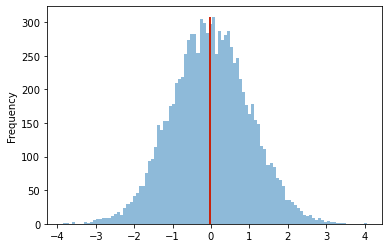

In [127]:
histograma(datos_limpios["aleatorios"])

# Actividad

Dataset: 03Bank_Data.csv

Buscar valores perdidos y atípicos en las columnas de "Balance" y "Estimated Salary".

Nota: realiza el histograma de estas dos columnas. 

Nota: si llegas a encontrar valores perdidos, se te va a cuestionar la estrategía que utilizes para su tratamiento. Justifica tu respuesta.


In [135]:
datos = pd.read_csv("./data/03Bank_Data.csv")

In [136]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
datos  = datos.dropna(how="any")

In [140]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9997 non-null   int64  
 1   CustomerId       9997 non-null   int64  
 2   Surname          9997 non-null   object 
 3   CreditScore      9997 non-null   int64  
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   int64  
 7   Tenure           9997 non-null   int64  
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   int64  
 11  IsActiveMember   9997 non-null   int64  
 12  EstimatedSalary  9997 non-null   float64
 13  Exited           9997 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [141]:
datos["Balance"].describe()

count      9997.000000
mean      76496.778384
std       62395.828317
min           0.000000
25%           0.000000
50%       97208.460000
75%      127649.640000
max      250898.090000
Name: Balance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

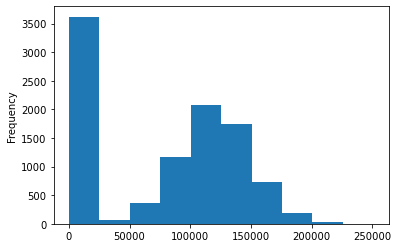

In [142]:
datos["Balance"].plot.hist()

In [145]:
datos_limpios = datos.loc[lambda x: x["Balance"]>0]

<AxesSubplot:ylabel='Frequency'>

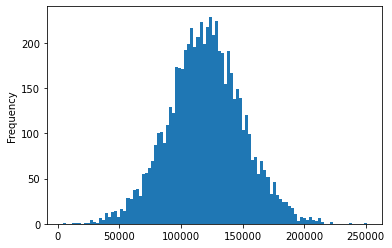

In [147]:
datos_limpios["Balance"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

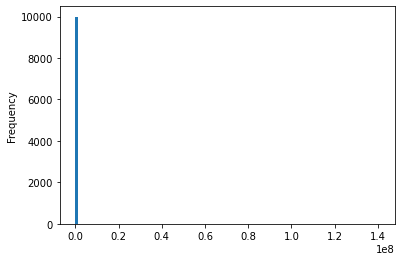

In [149]:
datos["EstimatedSalary"].plot.hist(bins=100)

<AxesSubplot:>

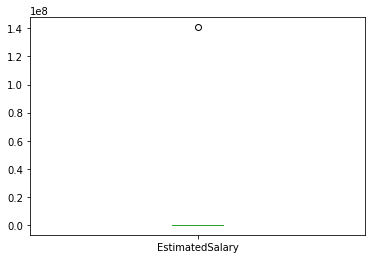

In [150]:
datos["EstimatedSalary"].plot.box()

In [152]:
datos["EstimatedSalary"].describe() / 1000000

count      0.009997
mean       0.114177
std        1.408696
min        0.000012
25%        0.051016
50%        0.100236
75%        0.149400
max      140.831200
Name: EstimatedSalary, dtype: float64

In [153]:
max(datos["EstimatedSalary"])

140831200.0

In [154]:
datos_limpios = datos_limpios[datos_limpios["EstimatedSalary"]< max(datos["EstimatedSalary"])]

<AxesSubplot:ylabel='Frequency'>

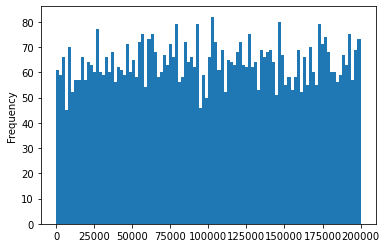

In [155]:
datos_limpios["EstimatedSalary"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

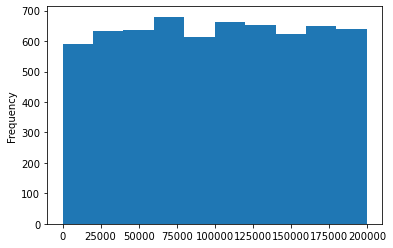

In [156]:
datos_limpios["EstimatedSalary"].plot.hist()

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

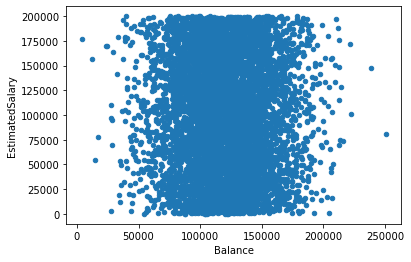

In [157]:
datos_limpios.plot(kind="scatter", x="Balance", y="EstimatedSalary")

# Coeficiente de correlación

In [158]:
datos = pd.read_csv("./data/01Salary_Data.csv")

In [159]:
datos

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

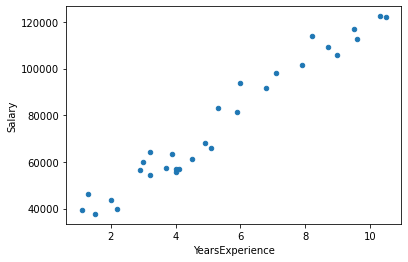

In [160]:
datos.plot(kind="scatter", x="YearsExperience", y="Salary")

In [161]:
datos.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [166]:
from scipy import stats
stats.pearsonr(datos["YearsExperience"],datos["Salary"])

(0.9782416184887599, 1.1430681092271564e-20)

In [168]:
datos_limpios.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.008087,-0.000800,0.013767,0.000421,-0.004986,-0.001577,0.007366,0.017289,-0.010182,-0.005243
CustomerId,0.008087,1.000000,0.012816,-0.006348,-0.028841,-0.008461,0.018055,-0.020849,0.002099,0.015173,-0.007556
CreditScore,-0.000800,0.012816,1.000000,-0.009531,0.002971,-0.004784,0.008988,-0.015051,0.031053,0.000579,-0.030820
Age,0.013767,-0.006348,-0.009531,1.000000,0.009335,-0.012846,0.007715,-0.020400,0.063293,-0.008670,0.301530
Tenure,0.000421,-0.028841,0.002971,0.009335,1.000000,0.005976,0.006236,0.025977,-0.042650,0.012475,-0.001251
Balance,-0.004986,-0.008461,-0.004784,-0.012846,0.005976,1.000000,-0.000934,0.006623,-0.020275,-0.001631,0.017295
NumOfProducts,-0.001577,0.018055,0.008988,0.007715,0.006236,-0.000934,1.000000,0.003020,-0.006460,0.025779,0.077958
HasCrCard,0.007366,-0.020849,-0.015051,-0.020400,0.025977,0.006623,0.003020,1.000000,-0.018439,-0.004137,-0.002019
IsActiveMember,0.017289,0.002099,0.031053,0.063293,-0.042650,-0.020275,-0.006460,-0.018439,1.000000,-0.013733,-0.171826
EstimatedSalary,-0.010182,0.015173,0.000579,-0.008670,0.012475,-0.001631,0.025779,-0.004137,-0.013733,1.000000,0.006120


In [170]:
datos_limpios[["Balance","EstimatedSalary"]].corr()

,Balance,EstimatedSalary
Balance,1.000000,-0.001631
EstimatedSalary,-0.001631,1.000000
